# Exercicis de Train-Test amb ScikitLearn a partir d'un dataset amb informació sobre les vivendes de Houston.
# Ejercicios de Train-Test con ScikitLearn a partir de un dataset con información sobre las viviendas de Houston.
# Train-Test exercises with ScikitLearn from a dataset with information about housing in Houston.


- Exercici 1

Parteix el conjunt de dades adjunt en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

També adjunt trobaràs una descripció de les diferents variables del dataset.


- Ejercicio 1

Parte el conjunto de datos adjunto en train y test. Estudia ambos conjuntos por separado, a nivel descriptivo.

También adjunto encontrarás una descripción de las diferentes variables del dataset.


- Exercise 1

Start the attached data set in train and test. Study the two sets separately, at a descriptive level.

Also attached you will find a description of the different variables of the dataset.




In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
df = pd.read_csv("/content/gdrive/MyDrive/DS/S5.Introducció al test d'hipotesis i al ML/M5T02/housing data.csv", sep=',')

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 1980.   N.B. Various transformations are used in the table on pages 244-261.
  -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.

4. Relevant Information:
Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes:
13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.

In [ ]:
df.head()

,0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,24.00
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [73]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [74]:
df = pd.read_csv("/content/gdrive/MyDrive/DS/S5.Introducció al test d'hipotesis i al ML/M5T02/housing data.csv", sep=',',header=None)

In [75]:
df.columns = cols

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


<Axes: >

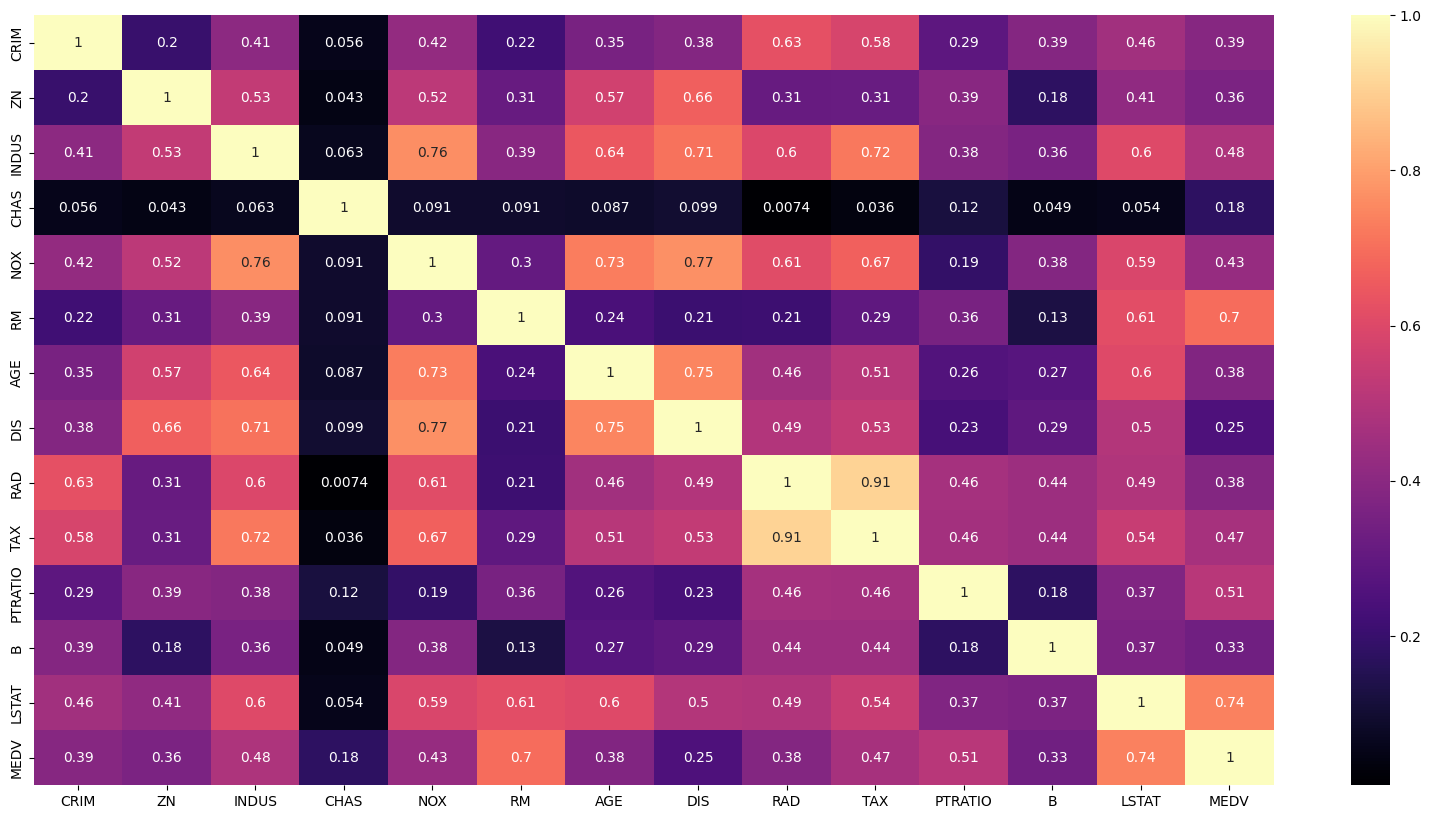

In [19]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True,cmap ='magma')

In [37]:
tabla_contingencia_chas = pd.crosstab(df['CHAS'], columns='count')
tabla_contingencia_rad = pd.crosstab(df['RAD'], columns='count')

print("Tabla de contingencia de CHAS:")
print(tabla_contingencia_chas)

print("\nTabla de contingencia de RAD:")
print(tabla_contingencia_rad)

Tabla de contingencia de CHAS:
col_0  count
CHAS        
0        471
1         35

Tabla de contingencia de RAD:
col_0  count
RAD         
1         20
2         24
3         38
4        110
5        115
6         26
7         17
8         24
24       132


In [71]:
import sklearn
from sklearn.model_selection import train_test_split

In [76]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Información del conjunto de entrenamiento
print("Información del conjunto de entrenamiento:")
print(X_train.info())

# Información del conjunto de prueba
print("\nInformación del conjunto de prueba:")
print(X_test.info())

Información del conjunto de entrenamiento:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 477 to 102
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    float64
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 44.2 KB
None

Información del conjunto de prueba:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 173 to 75
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0  

In [ ]:
# Estadísticas descriptivas del conjunto de entrenamiento (X_train)
print("Estadísticas descriptivas del conjunto de entrenamiento (X_train):")
print(X_train.describe())
# Estadísticas descriptivas del conjunto de prueba (X_test)
print("\nEstadísticas descriptivas del conjunto de prueba (X_test):")
print(X_test.describe())

Estadísticas descriptivas del conjunto de entrenamiento (X_train):
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean     3.609125   11.569307   10.985050    0.071782    0.556484    6.315891   
std      8.875058   23.152481    6.894618    0.258447    0.117704    0.709452   
min      0.009060    0.000000    0.740000    0.000000    0.385000    3.863000   
25%      0.081437    0.000000    5.130000    0.000000    0.452000    5.890500   
50%      0.261390    0.000000    8.560000    0.000000    0.538000    6.210000   
75%      3.202962   20.000000   18.100000    0.000000    0.631000    6.636750   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  404.000000  404.000000  404.000000  404.000000  404.000000  404.000000   
mean    68.556436    3.808195    9.356436

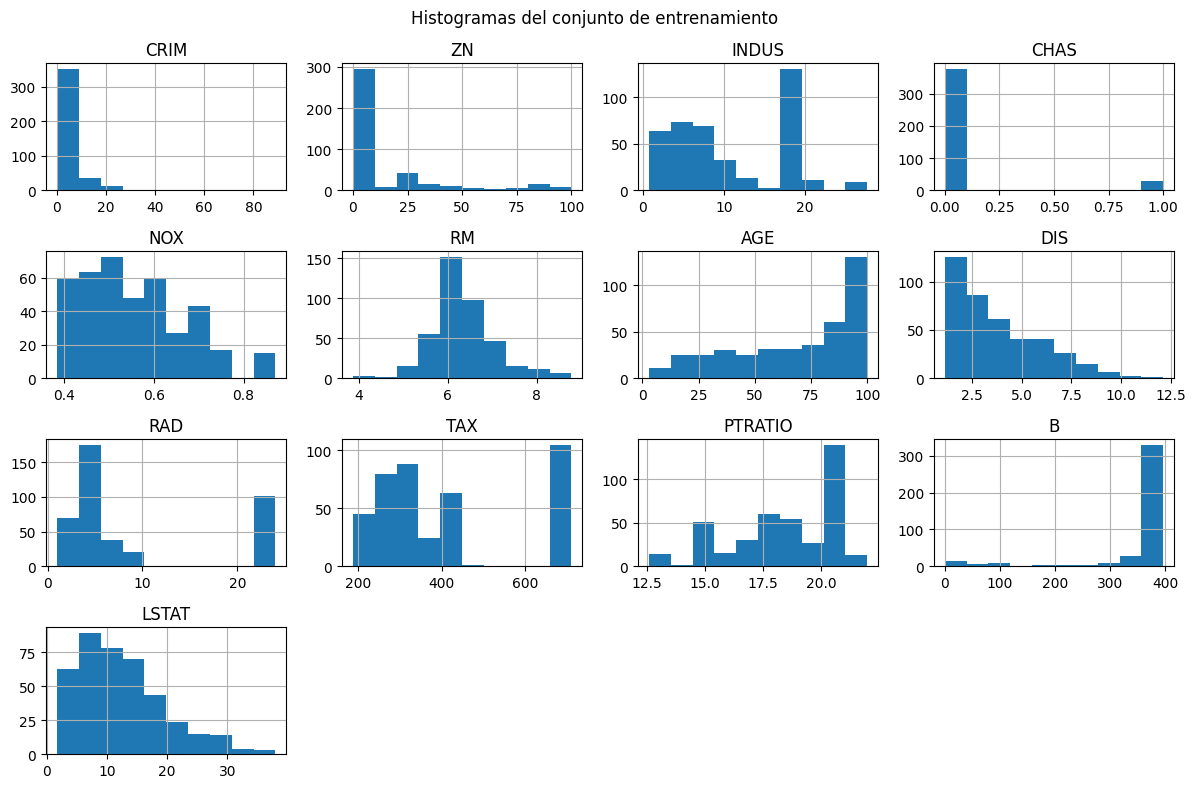

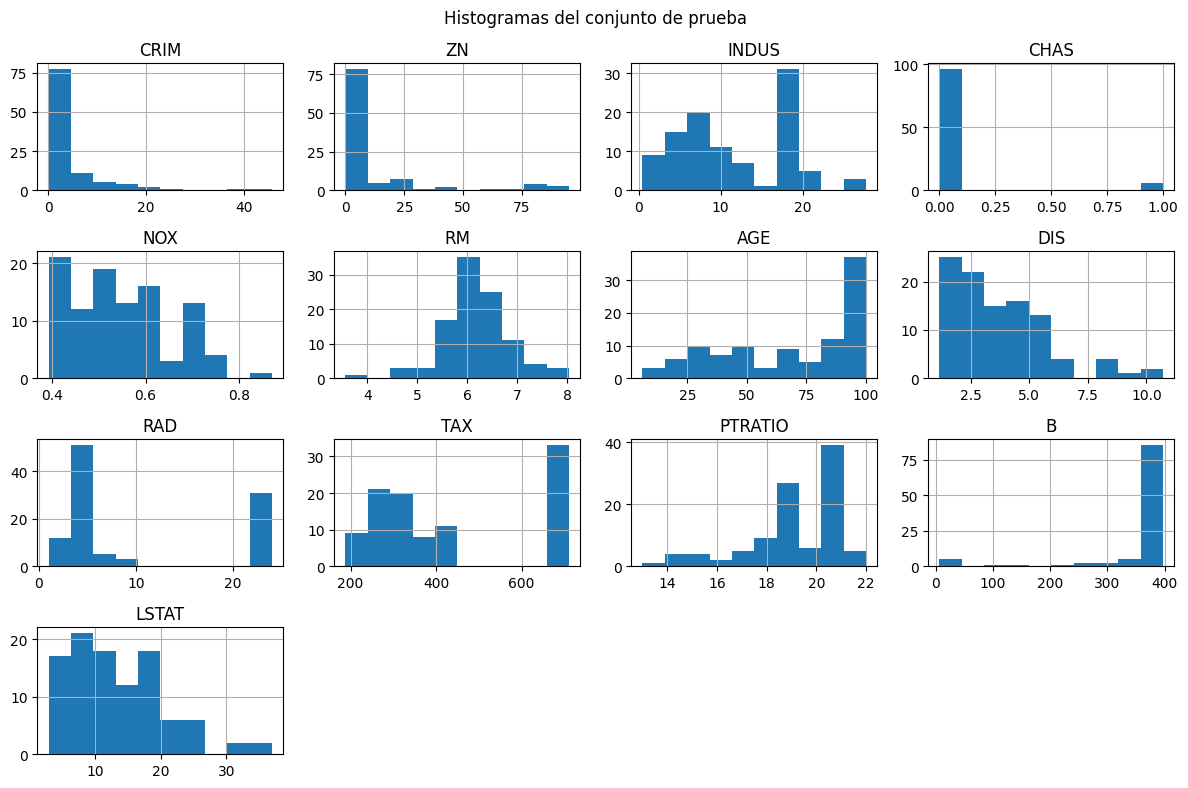

In [ ]:
# Histogramas de las variables en el conjunto de entrenamiento
X_train.hist(figsize=(12, 8))
plt.suptitle("Histogramas del conjunto de entrenamiento")
plt.tight_layout()
plt.show()

# Histogramas de las variables en el conjunto de prueba
X_test.hist(figsize=(12, 8))
plt.suptitle("Histogramas del conjunto de prueba")
plt.tight_layout()
plt.show()

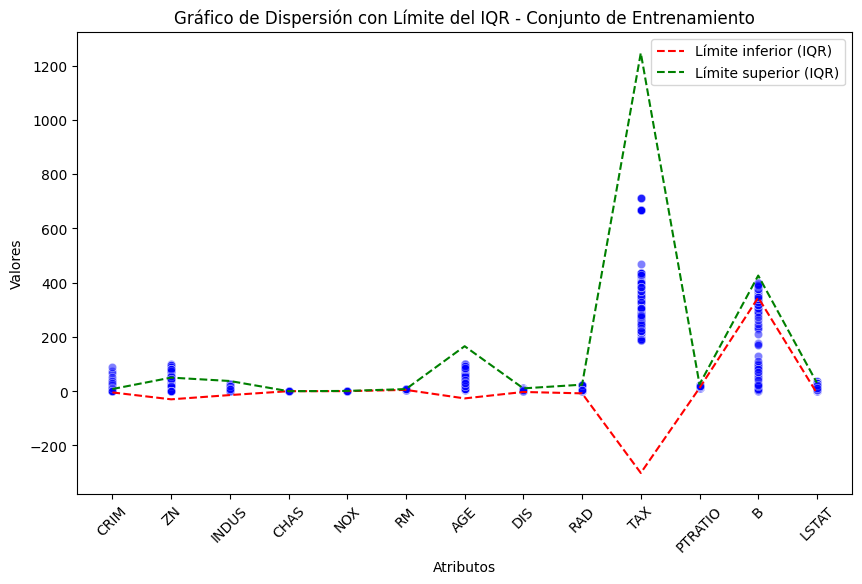

In [ ]:
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

# Definir el rango para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Gráfico de dispersión con la línea de referencia del IQR
plt.figure(figsize=(10, 6))
for column in X_train.columns:
    sns.scatterplot(x=[column]*len(X_train), y=X_train[column], color='b', alpha=0.5)
plt.plot(lower_bound, color='r', linestyle='dashed', label='Límite inferior (IQR)')
plt.plot(upper_bound, color='g', linestyle='dashed', label='Límite superior (IQR)')
plt.xticks(rotation=45)
plt.title("Gráfico de Dispersión con Límite del IQR - Conjunto de Entrenamiento")
plt.xlabel("Atributos")
plt.ylabel("Valores")
plt.legend()
plt.show()

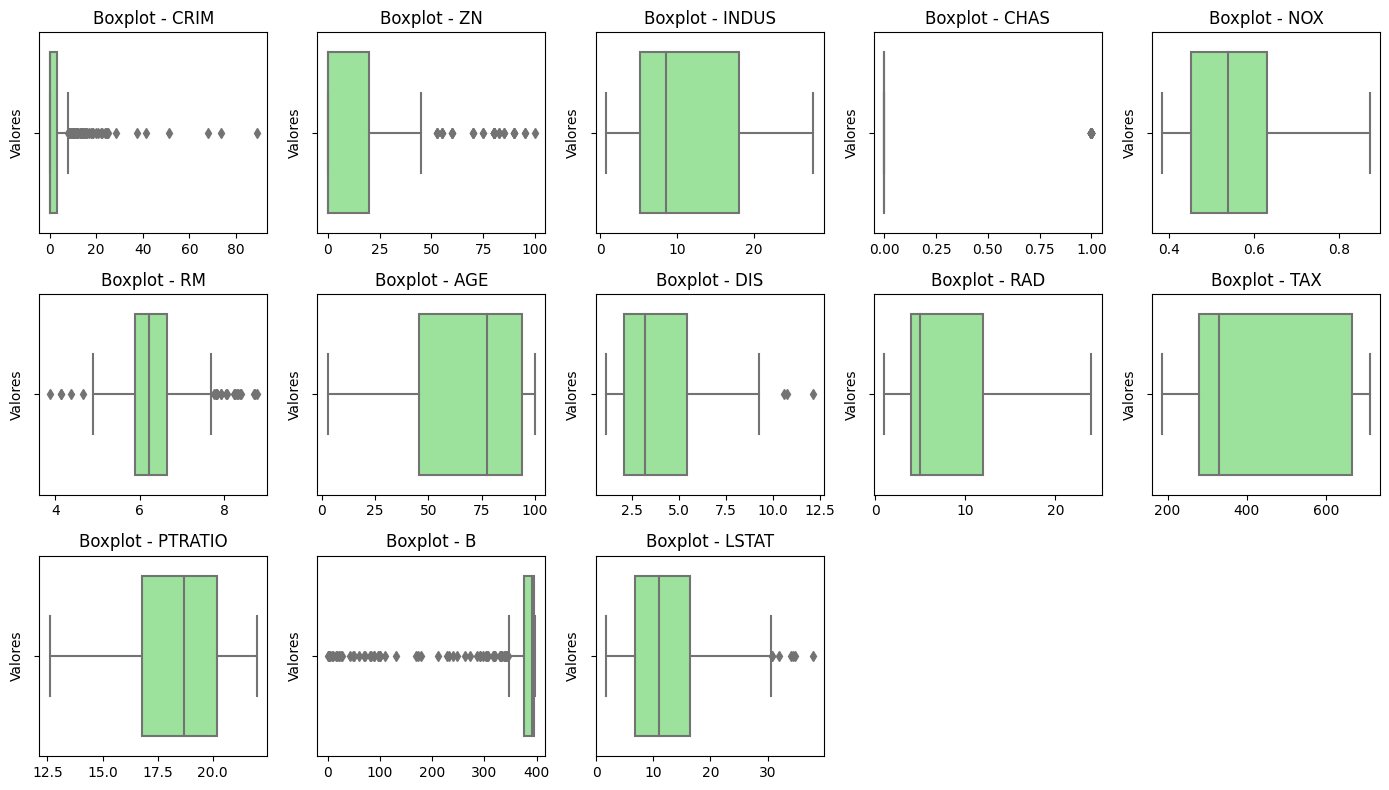

In [ ]:
# Gráfico de diagrama de caja para cada atributo en el conjunto de entrenamiento (X_train)
plt.figure(figsize=(14, 8))
for i, column in enumerate(X_train.columns):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(x=X_train[column], color='lightgreen')
    plt.title(f"Boxplot - {column}")
    plt.xlabel("")
    plt.ylabel("Valores")
plt.tight_layout()
plt.show()

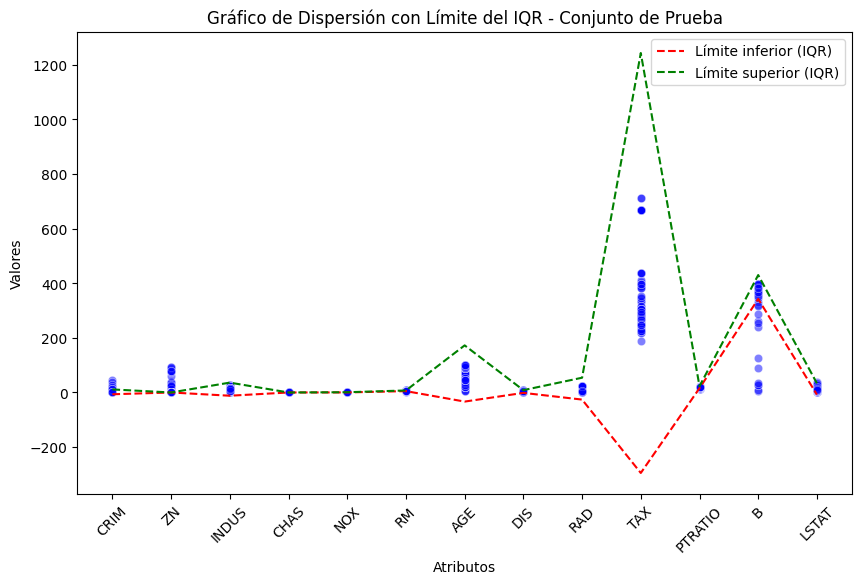

In [ ]:
# Calcular los cuartiles (Q1 y Q3) y el IQR para cada atributo en el conjunto de prueba
Q1_test = X_test.quantile(0.25)
Q3_test = X_test.quantile(0.75)
IQR_test = Q3_test - Q1_test

# Definir el rango para identificar outliers utilizando el IQR en el conjunto de prueba
lower_bound_test = Q1_test - 1.5 * IQR_test
upper_bound_test = Q3_test + 1.5 * IQR_test

# Crear el gráfico de dispersión con la línea de referencia del IQR en el conjunto de prueba
plt.figure(figsize=(10, 6))
for column in X_test.columns:
    sns.scatterplot(x=[column] * len(X_test), y=X_test[column], color='b', alpha=0.5)

# Añadir las líneas de referencia del IQR como límites para identificar outliers en el conjunto de prueba
plt.plot(lower_bound_test, color='r', linestyle='dashed', label='Límite inferior (IQR)')
plt.plot(upper_bound_test, color='g', linestyle='dashed', label='Límite superior (IQR)')

plt.xticks(rotation=45)
plt.title("Gráfico de Dispersión con Límite del IQR - Conjunto de Prueba")
plt.xlabel("Atributos")
plt.ylabel("Valores")
plt.legend()
plt.show()

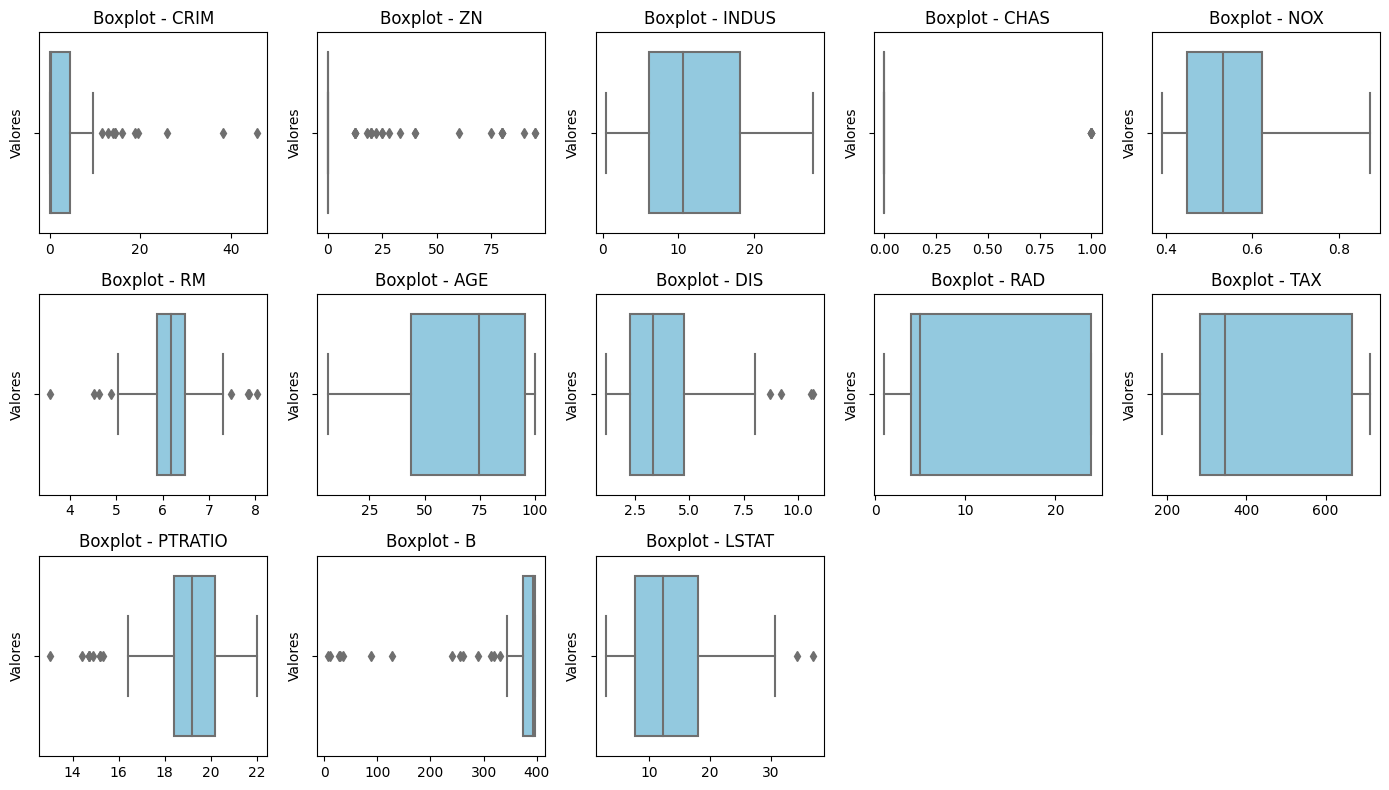

In [ ]:
# Gráfico de diagrama de caja para cada atributo en el conjunto de prueba (X_test)
plt.figure(figsize=(14, 8))
for i, column in enumerate(X_test.columns):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(x=X_test[column], color='skyblue')
    plt.title(f"Boxplot - {column}")
    plt.xlabel("")
    plt.ylabel("Valores")
plt.tight_layout()
plt.show()

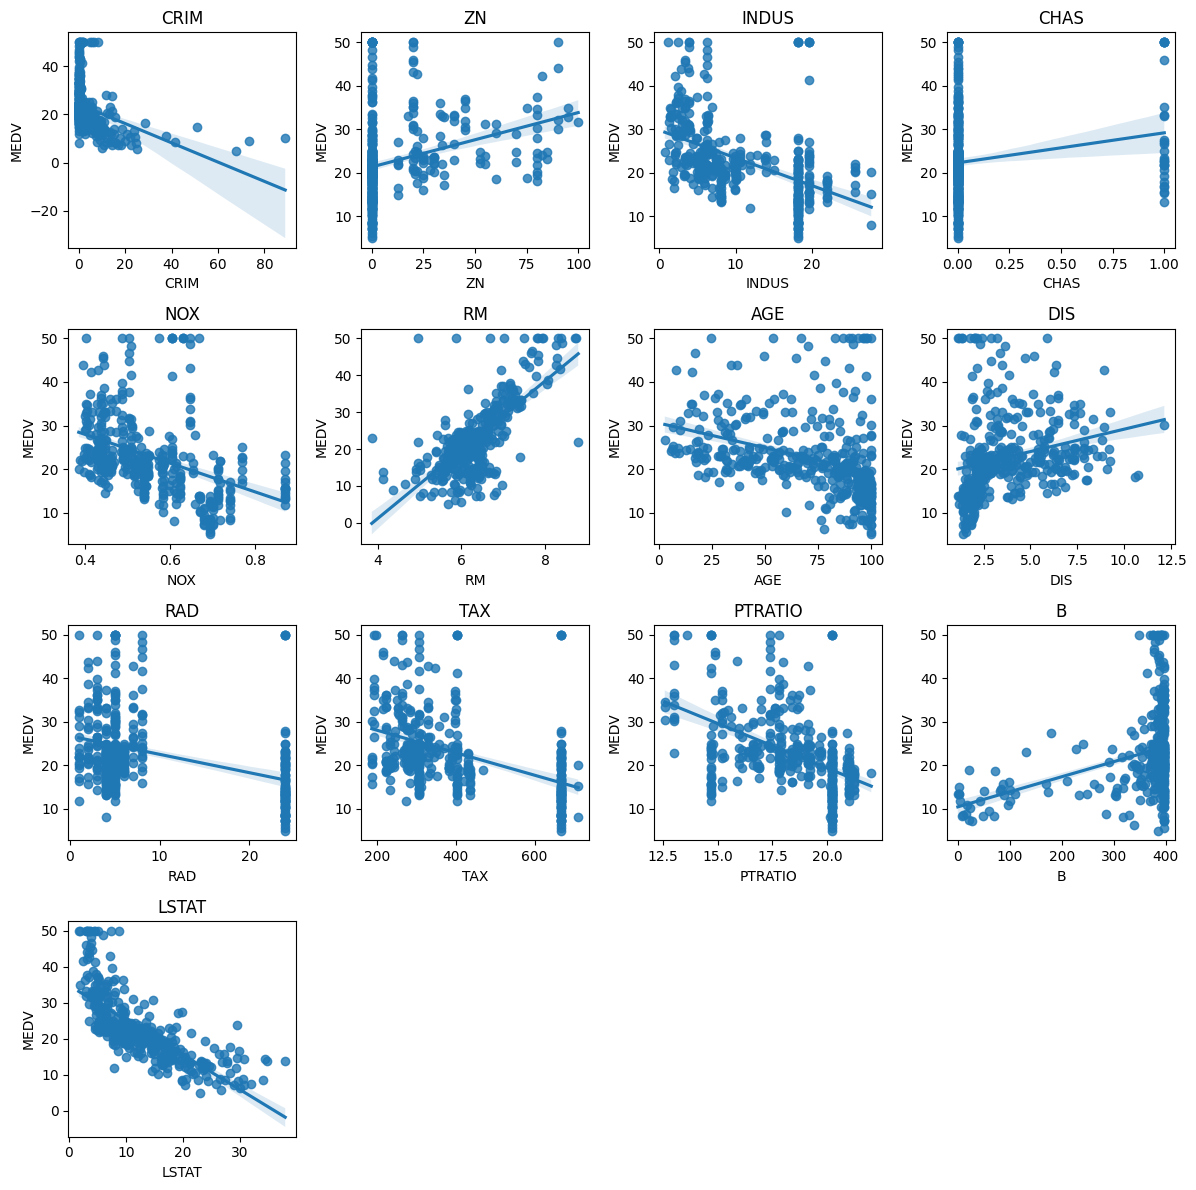

In [32]:
# Descriptiva bivariante para conjunto de entrenamiento (X_train)
plt.figure(figsize=(12, 12))
for i, va in enumerate(X_train.columns, 1):
    plt.subplot(4, 4, i)
    sns.regplot(x=va, y=y_train, data=X_train)
    plt.title(va)

plt.tight_layout()
plt.show()

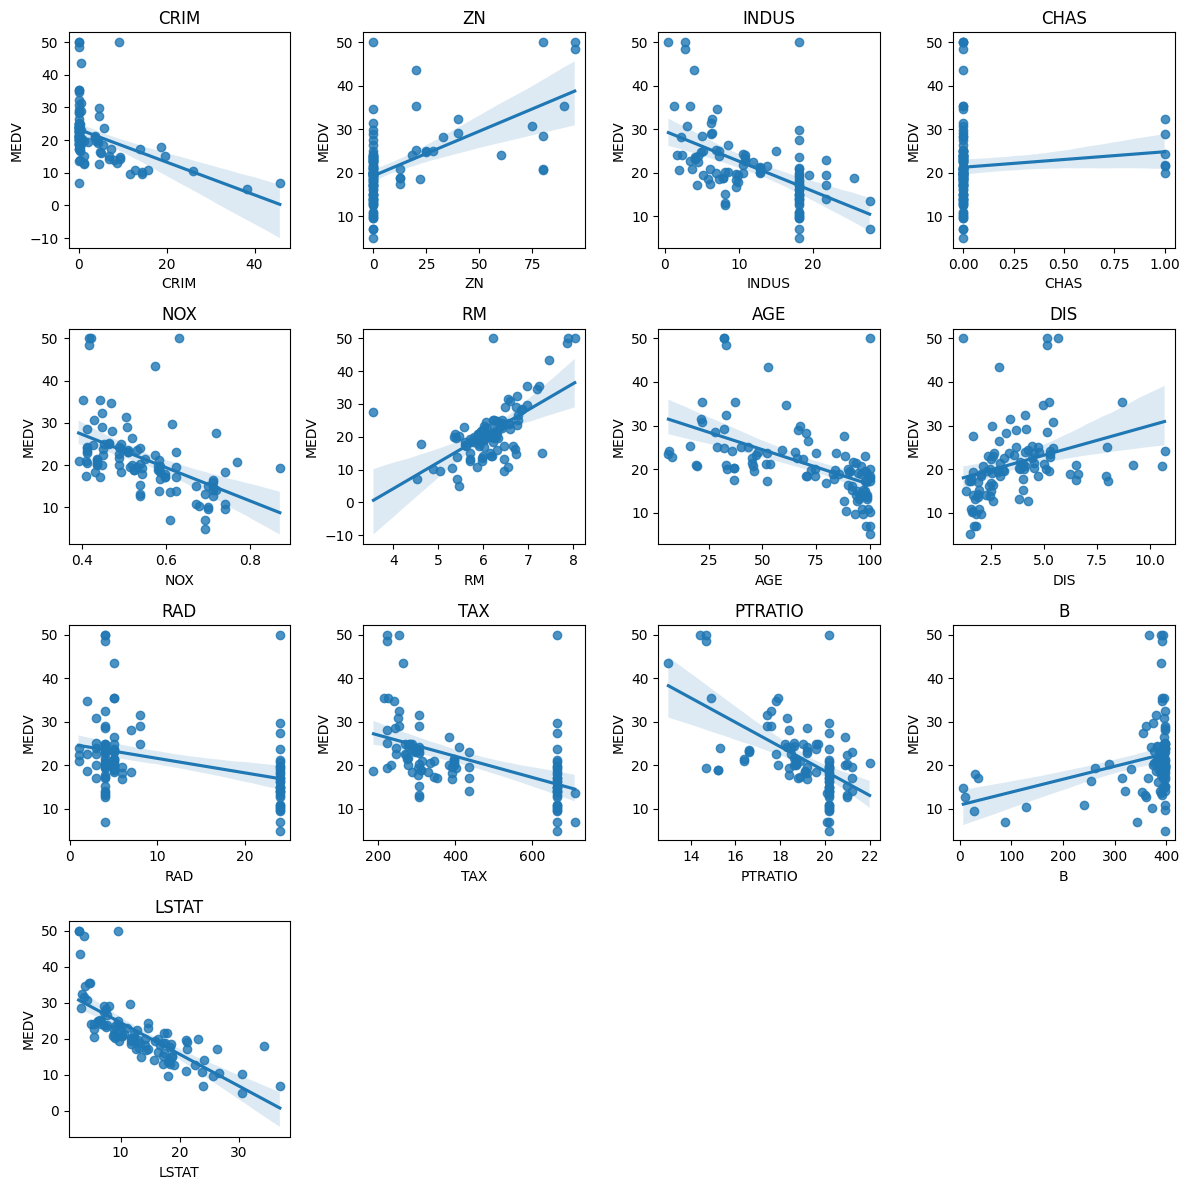

In [78]:
# Descriptiva bivariante para conjunto de entrenamiento (X_train)
plt.figure(figsize=(12, 12))
for i, va in enumerate(X_test.columns, 1):
    plt.subplot(4, 4, i)
    sns.regplot(x=va, y=y_test, data=X_test)
    plt.title(va)

plt.tight_layout()
plt.show()

- Exercici 2

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

- Ejercicio 2

Aplica algún proceso de transformación (estandarizar los datos numéricos, crear columnas dummies, polinomios...).

- Exercise 2

Apply some transformation process (standardize numerical data, create dummy columns, polynomials...).


In [52]:
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

In [79]:
X_test.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [86]:
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
skl_yeojohnson = pt.fit(X_train)
#Lets get the Lambdas that were found
print (skl_yeojohnson.lambdas_)

calc_lambdas = skl_yeojohnson.lambdas_

#Transform the data
skl_yeojohnson = pt.transform(X_train)

#Pass the transformed data into a new dataframe
df_xt = pd.DataFrame(data=skl_yeojohnson, columns=X_train.columns)

df_xt.head()

[-9.58994950e-01 -8.67044961e-01  3.32416123e-01 -2.00979852e+01
 -4.03313732e+00 -1.44335614e-02  1.38826699e+00 -4.59648154e-01
 -3.67935380e-01 -5.30210477e-01  4.08852848e+00  3.74904935e+00
  1.23803850e-01]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.632418,-0.611431,1.025910,-0.278089,0.660141,-1.500965,1.088457,-0.820579,1.470669,1.398237,0.879939,-0.660366,1.519160
1,0.005892,-0.611431,-0.220198,-0.278089,0.016667,-0.660125,-0.535803,0.613586,-0.509927,-0.430816,1.429752,0.594880,-0.422094
2,-0.989911,1.645267,-0.589398,-0.278089,-1.118418,-0.364348,-1.560845,1.281746,-2.286892,-0.459128,-0.799009,-0.354822,-0.548273
3,1.441477,-0.611431,1.025910,-0.278089,0.660141,-0.258340,0.568585,-0.894412,1.470669,1.398237,0.879939,-2.788304,1.387242
4,0.106125,-0.611431,-0.220198,-0.278089,0.016667,-0.824422,-0.055165,0.305059,-0.509927,-0.430816,1.429752,0.447936,0.056144


In [87]:
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
skl_yeojohnsont = pt.fit(X_train)
#Lets get the Lambdas that were found
print (skl_yeojohnsont.lambdas_)

calc_lambdas = skl_yeojohnsont.lambdas_

#Transform the data
skl_yeojohnsont = pt.transform(X_test)

#Pass the transformed data into a new dataframe
df_xtt = pd.DataFrame(data=skl_yeojohnsont, columns=X_test.columns)

df_xtt.head()

[-9.58994950e-01 -8.67044961e-01  3.32416123e-01 -2.00979852e+01
 -4.03313732e+00 -1.44335614e-02  1.38826699e+00 -4.59648154e-01
 -3.67935380e-01 -5.30210477e-01  4.08852848e+00  3.74904935e+00
  1.23803850e-01]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.847940,-0.611431,-1.023573,-0.278089,-0.263310,0.190174,0.527177,-0.375809,-0.222363,-0.536756,-0.911420,0.591044,-0.315858
1,-0.934003,1.656536,-0.522607,3.595975,-0.998453,0.658797,-1.299657,0.436044,-0.509927,-1.003821,-0.513130,0.635996,-1.698425
2,-0.815428,-0.611431,1.860196,-0.278089,0.622408,-0.435634,1.154191,-1.046653,-0.509927,1.521140,0.815562,0.422010,0.902167
3,-0.848270,-0.611431,0.178956,-0.278089,-1.466974,-0.314152,-1.896848,0.898053,-0.509927,-0.449643,0.277170,0.446698,-1.082694
4,1.320229,-0.611431,1.025910,-0.278089,1.299745,0.021956,0.850785,-0.589368,1.470669,1.398237,0.879939,0.270235,0.817751


- Exercici 3

Resumeix les noves columnes generades de manera estadística i gràfica


- Ejercicio 3

Resume las nuevas columnas generadas de forma estadística y gráfica

- Exercise 3

It summarizes the newly generated columns statistically and graphically


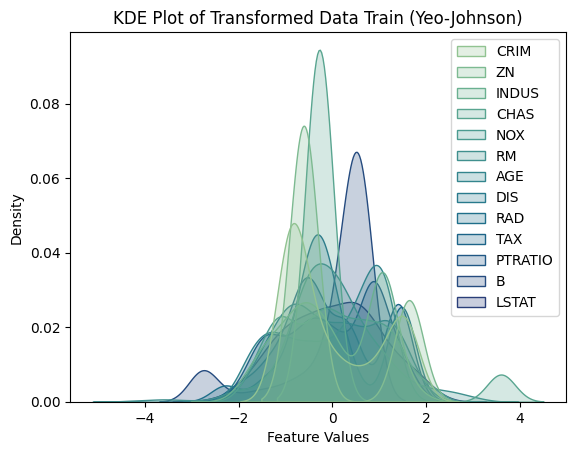

In [93]:
sns.kdeplot(data=df_xt, fill=True, palette="crest", hue=None)
plt.title('KDE Plot of Transformed Data Train (Yeo-Johnson)')
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.show()

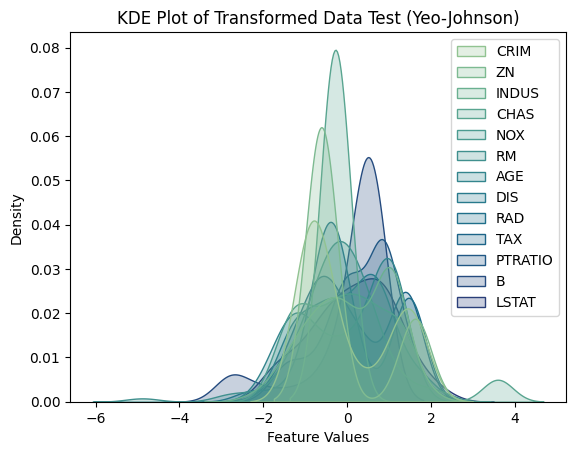

In [92]:
sns.kdeplot(data=df_xtt, fill=True, palette="crest", hue=None)
plt.title('KDE Plot of Transformed Data Test (Yeo-Johnson)')
plt.xlabel('Feature Values')
plt.ylabel('Density')
plt.show()